<a href="https://colab.research.google.com/github/smf-9000/images-through-ML/blob/main/fineTuningResNet50fromTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# !mkdir /content/dataset_2
# !unzip "/content/drive/MyDrive/MY-WORK/datasets/image data of Natural Scenes around the world [kaggle]/archive.zip" -d /content/dataset_2
!unzip "/content/drive/MyDrive/dataset_shortcuts/archive.zip" -d /content/dataset_2

In [ ]:
batch_size = 64
img_height = 224
img_width = 224

In [ ]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
                                                            rescale=1./255,
                                                            shear_range=0.1,
                                                            zoom_range=0.1,
                                                            horizontal_flip=True)
test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_ds = train_data_gen.flow_from_directory(
        '/content/dataset_2/seg_train/seg_train',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='sparse')

Found 14034 images belonging to 6 classes.


In [ ]:
val_ds = test_data_gen.flow_from_directory(
        '/content/dataset_2/seg_test/seg_test',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='sparse')

Found 3000 images belonging to 6 classes.


In [ ]:
class_names = train_ds.class_indices
print('class_names', class_names)
no_of_classes = len(class_names)
print('no_of_classes', no_of_classes)

class_names {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
no_of_classes 6


## code

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, AveragePooling2D, Dropout, Input

In [ ]:
base_model = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
base_model.summary()

In [ ]:
X = base_model.output
X = AveragePooling2D((7,7), strides=(7,7))(X)
X = layers.Flatten()(X)
X = Dense(1024, activation='relu')(X)
X = Dropout(0.4)(X)
X = Dense(no_of_classes, activation='softmax')(X)

model = Model(inputs=base_model.input, outputs=X)

for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.summary()

In [ ]:
model.compile(
          optimizer=tf.keras.optimizers.Adam(),
          loss=tf.keras.losses.SparseCategoricalCrossentropy(),
          metrics=['accuracy'])

In [ ]:
history = model.fit(
                  train_ds, 
                  epochs = 5, 
                  batch_size = batch_size, 
                  validation_data=val_ds, 
                  validation_batch_size=batch_size)

Epoch 1/5
220/220 [==============================] - 187s 759ms/step - loss: 1.4701 - accuracy: 0.3794 - val_loss: 1.2611 - val_accuracy: 0.4230
Epoch 2/5
220/220 [==============================] - 165s 749ms/step - loss: 1.2308 - accuracy: 0.4824 - val_loss: 1.1173 - val_accuracy: 0.5613
Epoch 3/5
220/220 [==============================] - 164s 745ms/step - loss: 1.1418 - accuracy: 0.5344 - val_loss: 1.1204 - val_accuracy: 0.5540
Epoch 4/5
220/220 [==============================] - 163s 738ms/step - loss: 1.1123 - accuracy: 0.5454 - val_loss: 1.0248 - val_accuracy: 0.6003
Epoch 5/5
220/220 [==============================] - 165s 748ms/step - loss: 1.0609 - accuracy: 0.5708 - val_loss: 1.0574 - val_accuracy: 0.5563


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, imread

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

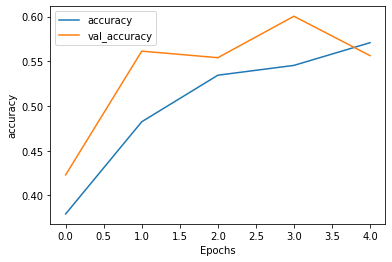

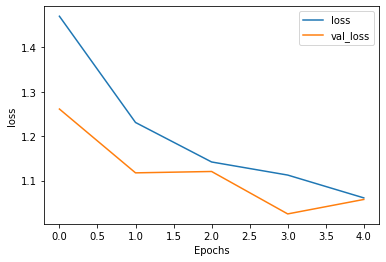

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, "loss")

In [ ]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_9
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
# 81
# let's train two last blocks
for layer in model.layers[:81]:
   layer.trainable = False
for layer in model.layers[81:]:
   layer.trainable = True

In [ ]:
model.compile(
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
          loss=tf.keras.losses.SparseCategoricalCrossentropy(),
          metrics=['accuracy'])

In [ ]:
history = model.fit(
                  train_ds, 
                  epochs = 10, 
                  batch_size = batch_size, 
                  validation_data=val_ds, 
                  validation_batch_size=batch_size)

Epoch 1/10
220/220 [==============================] - 184s 820ms/step - loss: 3.6255 - accuracy: 0.4947 - val_loss: 6.9182 - val_accuracy: 0.1493
Epoch 2/10
220/220 [==============================] - 179s 814ms/step - loss: 0.8538 - accuracy: 0.6702 - val_loss: 0.8472 - val_accuracy: 0.6390
Epoch 3/10
220/220 [==============================] - 180s 816ms/step - loss: 0.7235 - accuracy: 0.7267 - val_loss: 0.7960 - val_accuracy: 0.7057
Epoch 4/10
220/220 [==============================] - 179s 813ms/step - loss: 0.6583 - accuracy: 0.7534 - val_loss: 0.6663 - val_accuracy: 0.7437
Epoch 5/10
220/220 [==============================] - 180s 819ms/step - loss: 0.6022 - accuracy: 0.7816 - val_loss: 0.6666 - val_accuracy: 0.7620
Epoch 6/10
220/220 [==============================] - 180s 817ms/step - loss: 0.5581 - accuracy: 0.7926 - val_loss: 0.6125 - val_accuracy: 0.7860
Epoch 7/10
220/220 [==============================] - 181s 822ms/step - loss: 0.5253 - accuracy: 0.8088 - val_loss: 0.5876 -

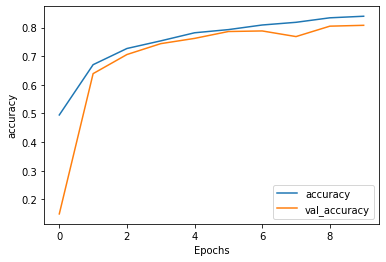

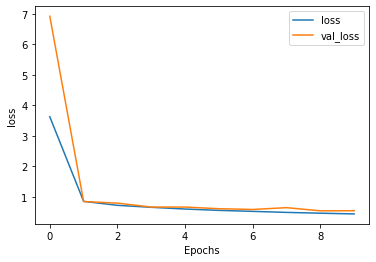

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, "loss")